In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')


print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(7500, 784) (7500,)
(1000, 784) (1000,)


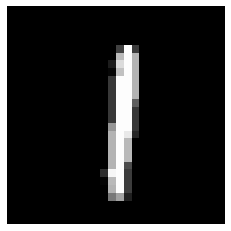

In [2]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    
displaychar(train_data[58])

In [3]:
from sklearn.svm import LinearSVC
def fit_linear_classifier(C_value=1.0):
    clf = LinearSVC(C=C_value, loss='hinge')
    clf.fit(train_data,train_labels)
    ## Get predictions on training data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return test_error

In [4]:
cvals = [0.01,0.1,1.0,10.0,100.0]
for c in cvals:
    test_error = fit_linear_classifier(c)
    print ("Error rate for C = %0.2f: test %0.3f" % (c, test_error))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Error rate for C = 0.01: test 0.006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Error rate for C = 0.10: test 0.005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Error rate for C = 1.00: test 0.006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Error rate for C = 10.00: test 0.007
Error rate for C = 100.00: test 0.007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [6]:
from sklearn.svm import SVC
def fit_quadratic_classifier(C_value=1.0):
    clf = SVC(C=C_value, kernel='poly',degree=2)
    clf.fit(train_data,train_labels)
    ## Get predictions on training data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return train_error, test_error

In [7]:
train_error, test_error = fit_quadratic_classifier(1.0)
print ("Error rate for C = %0.2f: train %0.3f test %0.3f" % (1.0, train_error, test_error))

Error rate for C = 1.00: train 0.002 test 0.002
